In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [9]:
N = 1000 
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])


In [2]:
!pip install sklearn

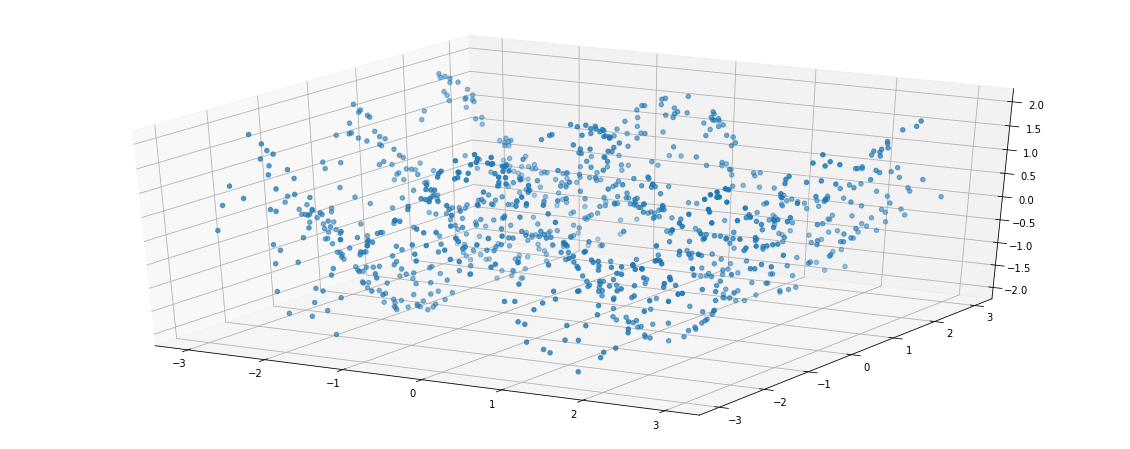

In [10]:
fig  = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:,1], Y)

In [11]:
model = SVR(C = 100)
model.fit(X, Y)

SVR(C=100)

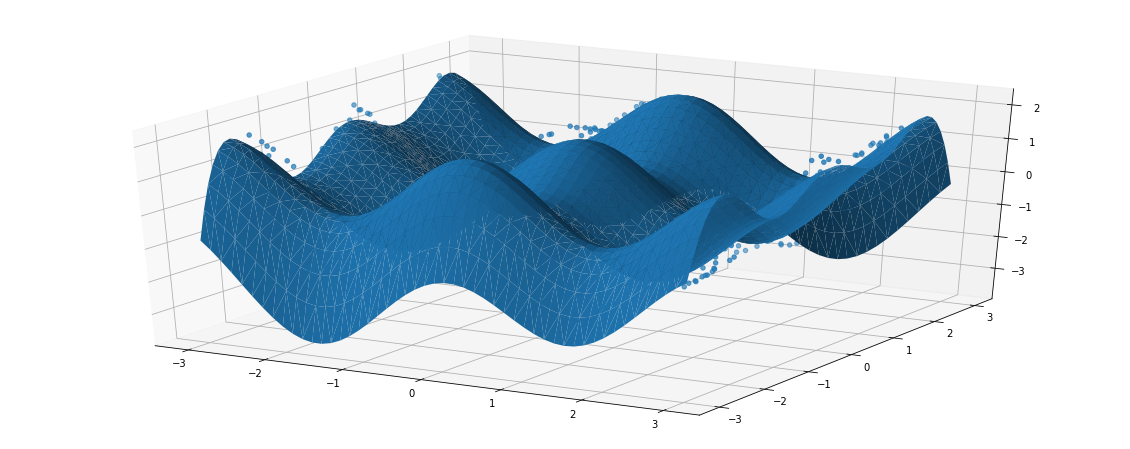

In [15]:
fig = plt.figure(figsize=( 20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)

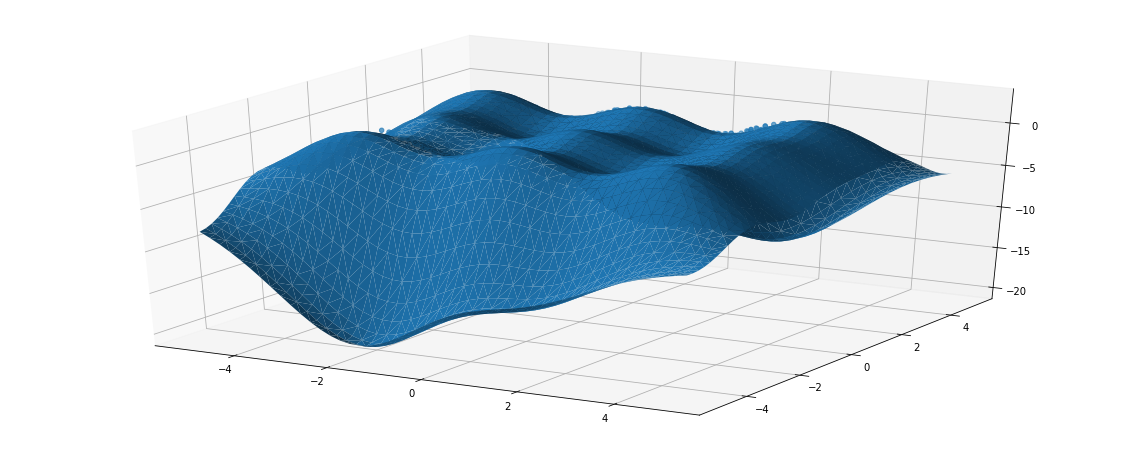

In [16]:
# Can it extraploate

fig = plt.figure(figsize=( 20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)

Not good.

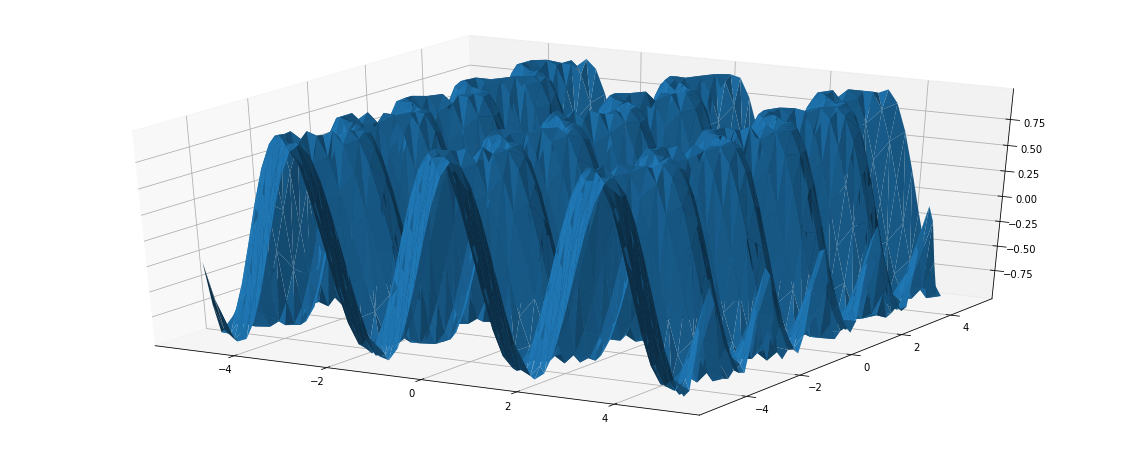

In [20]:
fig = plt.figure(figsize=( 20, 8))
ax = fig.add_subplot(111, projection = '3d')

line = np.linspace(-5,5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Ytrue = np.cos(2*Xgrid[:, 0] + np.cos(3*Xgrid[:, 1]))
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Ytrue, linewidth=0.2, antialiased=True)

In [21]:
model = RandomForestRegressor()
model.fit(X, Y)

RandomForestRegressor()

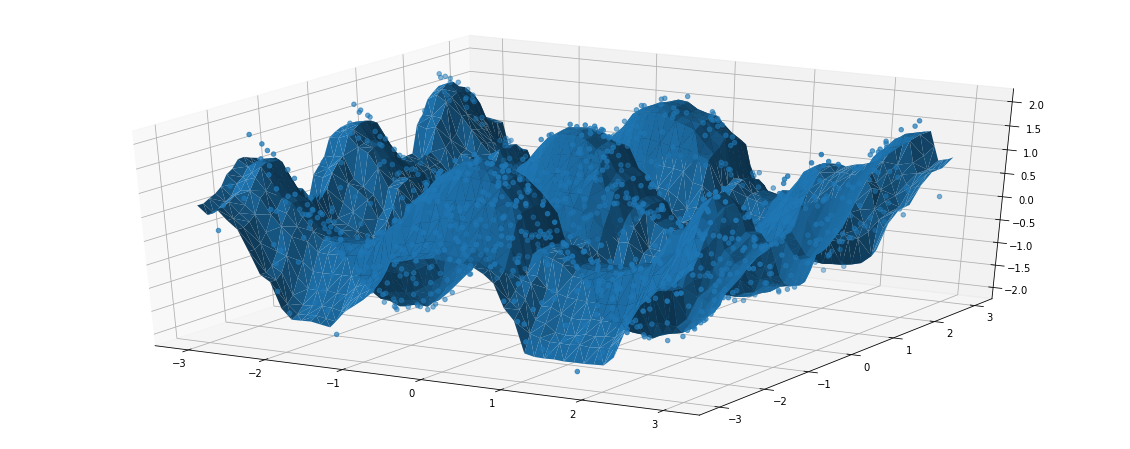

In [23]:
# Can it extraploate

fig = plt.figure(figsize=( 20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)

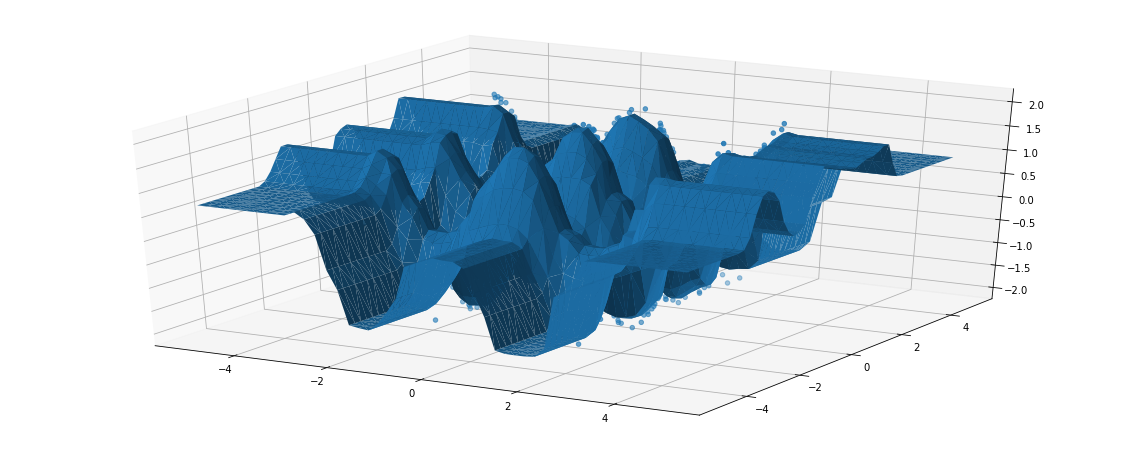

In [24]:
# Can it extraploate

fig = plt.figure(figsize=( 20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)

In [25]:
model = MLPRegressor(hidden_layer_sizes=128, alpha=0, learning_rate_init=0.01)
model.fit(X, Y)

MLPRegressor(alpha=0, hidden_layer_sizes=128, learning_rate_init=0.01)

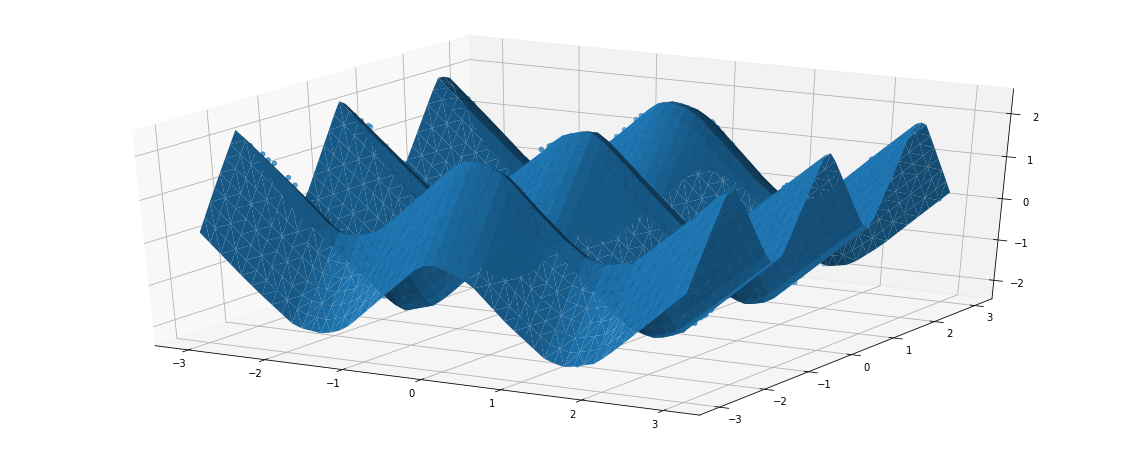

In [26]:
# Can it extraploate

fig = plt.figure(figsize=( 20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)

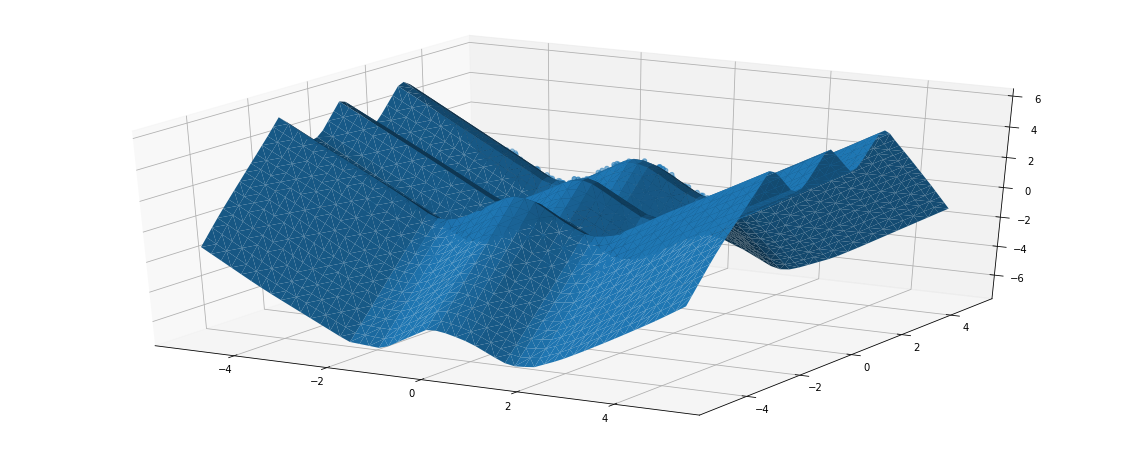

In [27]:
# Can it extraploate

fig = plt.figure(figsize=( 20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)

**Stock Price **

In [28]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2021-11-29 12:18:47--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  1.37MB/s    in 0.2s    

2021-11-29 12:18:48 (1.37 MB/s) - ‘SPY.csv’ saved [251935/251935]



In [29]:
import pandas as pd 
df = pd.read_csv('/content/SPY.csv', index_col ='Date',parse_dates=True)

In [30]:
train = df.iloc[:2000]['Close'].to_numpy()
test = df.iloc[2000:]['Close'].to_numpy()

In [31]:
Xtrain = []
for t in range(len(train)- 1):
    x0 = train[t]
    x1 = train[t+1]
    Xtrain.append((x0, x1)) 

Xtest = []
for  t in range(len(test)-1):
    x0 = test[t]
    x1 = test[t+1]
    Xtest.append((x0,x1))

In [32]:
Xtrain

[(113.33000183105469, 113.62999725341795),
 (113.62999725341795, 113.70999908447266),
 (113.70999908447266, 114.19000244140624),
 (114.19000244140624, 114.56999969482422),
 (114.56999969482422, 114.7300033569336),
 (114.7300033569336, 113.66000366210938),
 (113.66000366210938, 114.62000274658205),
 (114.62000274658205, 114.93000030517578),
 (114.93000030517578, 113.63999938964844),
 (113.63999938964844, 115.05999755859376),
 (115.05999755859376, 113.88999938964844),
 (113.88999938964844, 111.6999969482422),
 (111.6999969482422, 109.20999908447266),
 (109.20999908447266, 109.7699966430664),
 (109.7699966430664, 109.30999755859376),
 (109.30999755859376, 109.83000183105469),
 (109.83000183105469, 108.56999969482422),
 (108.56999969482422, 107.38999938964844),
 (107.38999938964844, 109.05999755859376),
 (109.05999755859376, 110.37999725341795),
 (110.37999725341795, 109.83000183105469),
 (109.83000183105469, 106.44000244140624),
 (106.44000244140624, 106.66000366210938),
 (106.66000366210

In [33]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

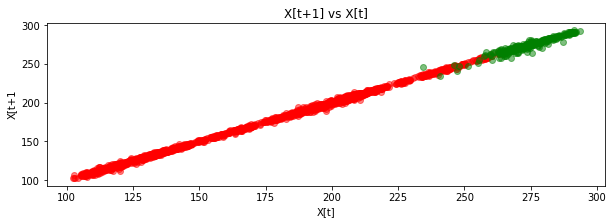

In [36]:
plt.figure(figsize=(10,3))
plt.xlabel('X[t]')
plt.ylabel('X[t+1')

plt.title('X[t+1] vs X[t]')
plt.scatter(Xtrain[:,0], Xtrain[:,1], c ='r', alpha = 0.5, label='train')
plt.scatter(Xtest[:,0], Xtest[:,1], c ='g', alpha = 0.5, label='test')